In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions as fnc
import os
import sys
import glob
import cv2

In [6]:
para={'OutDIR': '/DATA/vito/output/Ravi2_run2_dw1_cp1024_pps48/',
      'DataDIR': '/DATA/vito/data/',
      #'DatasetName': 'sand/*',
      'DatasetName': 'Ravi/*',
      #'DatasetName': 'example/*',
      'fid': None,
      'crop_size': 1024,
      'resample_factor': 1,
      'point_per_side': 48,
      'dilation_size':15,
      'min_size_factor':0.0001,
      #'window_step':0.5,
      'b':200
      }

if para.get('fid')==None:
    if not os.path.exists(para.get('DataDIR')+para.get('DatasetName')[:-1]):
        print('Input directory does not exist. Exiting script.')
        sys.exit()
    fn_img = glob.glob(para.get('DataDIR')+para.get('DatasetName'))
    fn_img.sort()
    for i,fn in enumerate(fn_img):
        print(i, ': ', fn)
    print('--------------')
    while True:
        try:
            user_input = int(input("Please select an image: "))
            print(f"{fn_img[user_input]} selected")
            para.update({'fid':user_input})
            break  # Exit the loop if the input is valid
        except ValueError:
            print("Requires an index. Please try again.")
resample_factor=para.get('resample_factor')
DataDIR=para.get('DataDIR')
DSname=para.get('DatasetName')
fid=para.get('fid')

image=fnc.load_image(DataDIR,DSname,fid)
print(image.shape)

0 :  /DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png
1 :  /DATA/vito/data/Ravi/Ravi3_DEM_clip_07mm_segment_ids.npy
2 :  /DATA/vito/data/Ravi/Ravi3_DEM_clip_07mm_segment_vis.npy
3 :  /DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif
4 :  /DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif
5 :  /DATA/vito/data/Ravi/label
--------------
/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif selected
Ravi3_orthomosaic_clip_02mm.tif imported
(28382, 32563, 3)


In [7]:
pre_para={'Downsample': {'fxy':1/8}}
prep_image=fnc.preprocessing_roulette(image, pre_para)

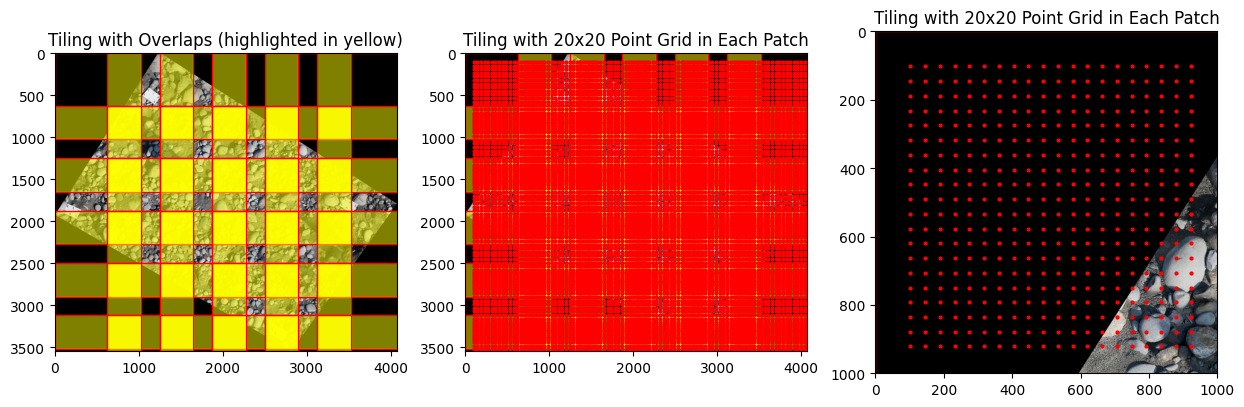

In [8]:
crop_size = 1024
overlap = 400
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
fnc.plot_tiling_with_overlap(prep_image, (crop_size,crop_size), overlap)
plt.subplot(1,3,2)
fnc.plot_grid_in_patches(prep_image, (crop_size,crop_size), overlap, 20)
plt.subplot(1,3,3)
fnc.plot_grid_in_patches(prep_image[:1000,:1000], (crop_size,crop_size), overlap, 20)